In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [2]:
tf.__version__

'2.4.1'

In [2]:
import numpy as np
array_1 = np.array([[1, 2, 7], [3, 4, 8]])
array_2 = np.array([[1, 2], [3, 9], [4, 16]])

In [4]:
for i in [0,2,3]:
    if i%2 == 0:
        print("even")
    elif i == 0:
        print("zero")
    else:
        print("odd")

even
even
odd


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [12]:
training_set = train_datagen.flow_from_directory('DATASET/TRAIN',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('DATASET/TEST',
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [17]:
#1st model (light category)
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [18]:
cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 112, 112, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [19]:
model = cnn.fit(x=training_set, validation_data = test_set, epochs=25)

Epoch 1/25
706/706 [==============================] - 347s 491ms/step - loss: 0.5598 - accuracy: 0.7647 - val_loss: 0.4092 - val_accuracy: 0.7784
Epoch 2/25
706/706 [==============================] - 344s 488ms/step - loss: 0.3974 - accuracy: 0.8165 - val_loss: 0.3424 - val_accuracy: 0.8102
Epoch 3/25
706/706 [==============================] - 345s 489ms/step - loss: 0.3721 - accuracy: 0.8276 - val_loss: 0.3171 - val_accuracy: 0.8257
Epoch 4/25
706/706 [==============================] - 345s 488ms/step - loss: 0.3484 - accuracy: 0.8390 - val_loss: 0.4007 - val_accuracy: 0.7724
Epoch 5/25
706/706 [==============================] - 345s 489ms/step - loss: 0.3282 - accuracy: 0.8494 - val_loss: 0.2482 - val_accuracy: 0.8679
Epoch 6/25
706/706 [==============================] - 351s 496ms/step - loss: 0.3125 - accuracy: 0.8552 - val_loss: 0.2058 - val_accuracy: 0.8914
Epoch 7/25
706/706 [==============================] - 358s 507ms/step - loss: 0.2965 - accuracy: 0.8655 - val_loss: 0.2134 -

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

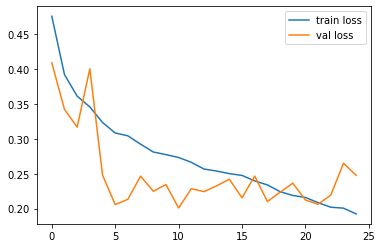

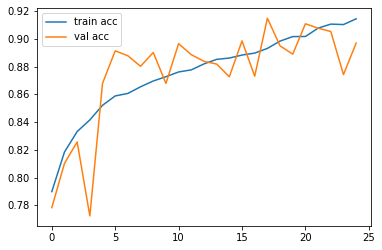

<Figure size 432x288 with 0 Axes>

In [21]:

plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:


cnn.save('model_1.h5')

In [22]:


y_pred = []
y_test = []

In [23]:
t = 43
path = f'hello.{t}'
print(path)

hello.43


In [25]:
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn.predict(test_image)
    y_test.append('O')
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')
    

In [26]:
y_pred

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'R',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [27]:
y_test

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [29]:
d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn.predict(test_image)
    y_test.append('R')
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')

In [30]:
Y_pred = np.array(y_pred)

In [31]:
Y_pred.shape

(2513,)

In [32]:
Y_test = np.array(y_test)

In [33]:
Y_test.shape

(2513,)

In [2]:
from sklearn.metrics import confusion_matrix as cm

In [35]:
cm_CNN_model_1 = cm(Y_test,Y_pred)

In [36]:
cm_CNN_model_1

array([[1313,   88],
       [ 146,  966]], dtype=int64)

In [37]:
(1313+966)/2513

0.9068842021488261

In [53]:
#2nd model (light category)

# Initialising the CNN
cnn_2 = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn_2.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn_2.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn_2.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_2.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_2.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn_2.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [54]:
cnn_2.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
cnn_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [55]:
model_2 = cnn_2.fit(x=training_set, validation_data = test_set, epochs=25)

Epoch 1/25
706/706 [==============================] - 67s 95ms/step - loss: 0.5245 - accuracy: 0.7705 - val_loss: 0.2776 - val_accuracy: 0.8814
Epoch 2/25
706/706 [==============================] - 66s 94ms/step - loss: 0.4032 - accuracy: 0.8141 - val_loss: 0.2910 - val_accuracy: 0.8583
Epoch 3/25
706/706 [==============================] - 64s 91ms/step - loss: 0.3674 - accuracy: 0.8246 - val_loss: 0.3201 - val_accuracy: 0.8619
Epoch 4/25
706/706 [==============================] - 62s 88ms/step - loss: 0.3773 - accuracy: 0.8209 - val_loss: 0.2891 - val_accuracy: 0.8571
Epoch 5/25
706/706 [==============================] - 62s 88ms/step - loss: 0.3511 - accuracy: 0.8337 - val_loss: 0.3057 - val_accuracy: 0.8456
Epoch 6/25
706/706 [==============================] - 62s 88ms/step - loss: 0.3397 - accuracy: 0.8371 - val_loss: 0.2843 - val_accuracy: 0.8743
Epoch 7/25
706/706 [==============================] - 63s 89ms/step - loss: 0.3394 - accuracy: 0.8407 - val_loss: 0.2742 - val_accuracy:

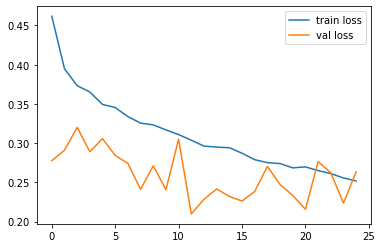

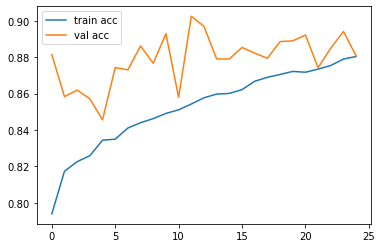

<Figure size 432x288 with 0 Axes>

In [57]:
plt.plot(model_2.history['loss'], label='train loss')
plt.plot(model_2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_2.history['accuracy'], label='train acc')
plt.plot(model_2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
from tensorflow.keras.models import load_model

cnn_2.save('model_2.h5')

In [3]:
from tensorflow.keras.models import load_model

In [61]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_2.predict(test_image)
    y_test.append('O')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')
        
d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_2.predict(test_image)
    y_test.append('R')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')

[-1.1564338]
[-1.2603238]
[-1.3006649]
[-0.9937743]
[-1.2106707]
[-1.1550086]
[-1.1083959]
[-1.0738591]
[-1.2618103]
[-1.1751478]
[-1.097703]
[-1.2269433]
[-1.4924679]
[-1.0967627]
[-1.1882269]
[0.2387976]
[1.1568036]
[-1.1831789]
[-1.1563315]
[-0.9026985]
[-0.92731357]
[-1.0484518]
[-1.1716981]
[-1.2064767]
[-1.173691]
[-1.1331308]
[-1.2061622]
[-1.2135272]
[-1.147032]
[-1.1626205]
[-1.1397998]
[-0.89563316]
[-1.0750802]
[-1.1999769]
[-1.0718577]
[-1.1847911]
[-1.0594152]
[-1.3062153]
[1.0713329]
[-2.0233417]
[-1.0663712]
[-1.0346062]
[-1.0448818]
[-1.0972157]
[-1.0249853]
[1.1951134]
[-0.68097025]
[-1.227416]
[-1.1170084]
[-1.160222]
[-1.1760664]
[-1.2088115]
[-1.0572171]
[-0.8309547]
[-1.0732121]
[-1.2339587]
[-1.1924882]
[-1.1928377]
[-1.1578779]
[-0.8441596]
[-1.1204824]
[-1.1425581]
[-1.1763918]
[-1.0076513]
[-1.2274752]
[-1.2173452]
[-0.96136254]
[-1.1813705]
[-1.2056184]
[-1.196181]
[-1.1220479]
[-1.3439567]
[-1.3153124]
[-1.1412745]
[-1.2455211]
[-1.084018]
[1.036907]
[-1.3348

[-1.0335213]
[0.7807142]
[1.2296712]
[-1.1311336]
[-1.1799014]
[1.1891747]
[-0.21060085]
[0.07589583]
[1.0416467]
[-1.1352618]
[-1.1273229]
[-0.24263199]
[-0.81075424]
[-1.2176921]
[-1.0571553]
[-0.94396555]
[-1.1960325]
[-1.0109566]
[-1.1354947]
[-0.81341064]
[0.4054252]
[0.14439642]
[-1.1910093]
[-1.2555003]
[0.6234206]
[-0.82950664]
[-1.230478]
[-0.79691356]
[-1.2226734]
[-1.2370751]
[1.0157714]
[-1.0865831]
[-0.9267224]
[-1.048442]
[-1.2011795]
[-1.1756158]
[1.3848021]
[1.1799266]
[0.7347403]
[-1.1598585]
[0.42692727]
[-1.0798883]
[-1.1400535]
[-1.1580203]
[-0.6367122]
[-0.4254637]
[-1.5479856]
[1.0383024]
[-1.17981]
[-0.5621711]
[-0.97085255]
[-0.05646834]
[-1.197943]
[-1.1768763]
[-1.2134314]
[-1.1581919]
[-1.2404366]
[-0.6938984]
[-1.0761614]
[-1.2882886]
[-1.181498]
[-1.0877177]
[-1.2674584]
[-1.0504339]
[1.0467772]
[-1.1057961]
[-1.1478662]
[-1.0915449]
[-1.102587]
[-1.0350006]
[0.9691569]
[-1.237354]
[1.0316021]
[-1.2000313]
[-1.2694895]
[-1.2625711]
[-1.1480079]
[-1.0611064]

[-1.0512954]
[-1.1301787]
[-1.0630364]
[-1.0835838]
[-1.2101746]
[-1.0335789]
[-1.1918173]
[-1.1506624]
[-1.145659]
[-1.070615]
[1.4616566]
[-1.1267929]
[-1.1143517]
[-1.0916791]
[-0.79768324]
[-1.2139561]
[-1.212199]
[-0.9863874]
[-0.04784544]
[-1.0470604]
[-1.1514003]
[-1.1067479]
[-1.0874708]
[-1.3031139]
[-1.2520943]
[-1.2625473]
[-1.1129138]
[-1.4587576]
[-1.0175829]
[-1.1572275]
[0.8838856]
[-1.0694065]
[-1.0054587]
[-1.17574]
[-1.2021723]
[-1.0694239]
[-1.0359612]
[-1.1653819]
[-1.1513517]
[-1.2198405]
[-1.1376066]
[-1.0218725]
[-1.21736]
[0.9692711]
[-1.1023748]
[-0.49631566]
[-0.7625962]
[-1.2463746]
[-1.1825166]
[0.8280848]
[1.1545167]
[-1.0473776]
[-1.0918665]
[-1.1013806]
[-1.0866635]
[-1.0283521]
[-0.7871182]
[-1.1549747]
[-1.1800954]
[-1.3936028]
[-1.1219301]
[-1.0856775]
[1.0186768]
[-1.1841595]
[-1.2353778]
[-1.2573426]
[-1.0671701]
[-1.086199]
[-1.2542908]
[-1.1371918]
[-1.0569487]
[-1.2730126]
[-1.1909299]
[-1.0607588]
[-1.2530284]
[-1.492239]
[-1.0479743]
[-1.1883409

[1.1932285]
[1.0262535]
[-0.91465324]
[-1.0850091]
[0.88497585]
[0.996597]
[-0.21911371]
[1.03316]
[-1.2664893]
[0.903354]
[-0.7430193]
[-1.0901697]
[1.3186448]
[0.3549966]
[0.97617394]
[0.8594325]
[-1.386204]
[1.2346015]
[0.22326559]
[1.4656272]
[1.0029275]
[-1.0745494]
[1.2896447]
[1.073787]
[1.0504622]
[-0.16764633]
[1.1792884]
[1.2714589]
[1.1056561]
[1.4042108]
[0.92823094]
[1.2463181]
[0.9756059]
[-0.67537105]
[1.1438341]
[1.0030277]
[-1.1233602]
[0.9430749]
[1.5623741]
[1.2852633]
[-0.95613104]
[1.2221429]
[1.1969783]
[-1.0776646]
[1.0016837]
[1.0490131]
[-1.067215]
[-1.1333513]
[1.0138302]
[1.847764]
[0.9788478]
[1.2784197]
[-1.0549841]
[1.0806892]
[1.2496471]
[-0.12318701]
[-1.0988746]
[1.1272738]
[1.0691292]
[1.0589447]
[1.1859331]
[1.2106173]
[1.6378064]
[0.9074984]
[1.0055499]
[-1.1849678]
[0.42354804]
[1.0165131]
[0.9915443]
[-1.3668816]
[1.047914]
[-0.32709533]
[1.1159642]
[1.0407708]
[-1.1026211]
[-1.2733254]
[0.9461549]
[1.1883597]
[-0.7781504]
[1.1646612]
[-0.9338373]


In [62]:
Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_2 = cm(Y_test,Y_pred)

In [64]:
print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_2

(2513,)
(2513,)


array([[1258,  143],
       [ 153,  959]], dtype=int64)

In [1]:
(1258+959)/2513

0.8822124950258655

In [9]:
#3rd model (light category)

# Initialising the CNN
cnn_3 = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn_3.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn_3.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_3.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_3.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn_3.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_3.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_3.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_3.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn_3.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn_3.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

cnn_3.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
cnn_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 32)         

In [10]:
model_3 = cnn_3.fit(x=training_set, validation_data = test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 171s 241ms/step - loss: 0.5455 - accuracy: 0.7575 - val_loss: 0.2691 - val_accuracy: 0.8802
Epoch 2/15
706/706 [==============================] - 67s 95ms/step - loss: 0.4179 - accuracy: 0.8035 - val_loss: 0.2641 - val_accuracy: 0.8758
Epoch 3/15
706/706 [==============================] - 71s 100ms/step - loss: 0.3870 - accuracy: 0.8155 - val_loss: 0.3237 - val_accuracy: 0.8548
Epoch 4/15
706/706 [==============================] - 70s 99ms/step - loss: 0.3906 - accuracy: 0.8154 - val_loss: 0.3005 - val_accuracy: 0.8516
Epoch 5/15
706/706 [==============================] - 73s 104ms/step - loss: 0.3970 - accuracy: 0.8103 - val_loss: 0.3030 - val_accuracy: 0.8512
Epoch 6/15
706/706 [==============================] - 71s 100ms/step - loss: 0.3830 - accuracy: 0.8134 - val_loss: 0.2722 - val_accuracy: 0.8639
Epoch 7/15
706/706 [==============================] - 73s 103ms/step - loss: 0.3957 - accuracy: 0.8077 - val_loss: 0.2907 - val_acc

In [11]:
cnn_3.save('model_3.h5')

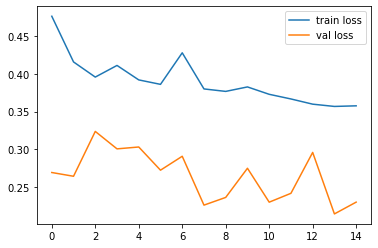

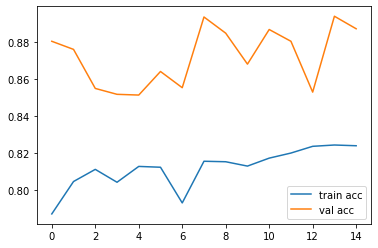

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(model_3.history['loss'], label='train loss')
plt.plot(model_3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_3.history['accuracy'], label='train acc')
plt.plot(model_3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_3.predict(test_image)
    y_test.append('O')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')
        
d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_3.predict(test_image)
    y_test.append('R')
    print(res[0])
    if(res[0]>=0):
        y_pred.append('R')
    else:
        y_pred.append('O')

[-1.0019338]
[-0.9993916]
[-0.9972488]
[-1.0079014]
[-1.0045907]
[-0.9971444]
[-1.0017806]
[-0.9923746]
[-1.0001245]
[-0.99842113]
[-0.9875093]
[-0.9924357]
[-0.9925256]
[-0.9877372]
[-1.0044594]
[-0.9523188]
[0.99219865]
[-0.9956643]
[-0.9829665]
[-1.0013713]
[-0.98408276]
[-0.9948445]
[-1.0050935]
[-0.9921125]
[-0.9967635]
[-1.0003026]
[-1.0034232]
[-0.99335396]
[-1.0053945]
[-0.9879254]
[-1.0097706]
[-0.9903318]
[-0.9982476]
[-1.0009412]
[-0.9839172]
[-0.9939646]
[-1.0044041]
[-0.9971289]
[-0.9864879]
[0.78973895]
[-1.0020375]
[-1.0085143]
[-1.0038772]
[-0.99510473]
[-1.021912]
[-1.0015099]
[-0.995262]
[-0.99903286]
[-1.003242]
[-0.99796957]
[-0.9971985]
[-0.9973293]
[-1.0068971]
[0.86396754]
[-1.010116]
[-1.0014586]
[-0.9980177]
[-1.0053198]
[-0.9993499]
[-0.9890548]
[-0.9963225]
[-0.99434763]
[-1.0060216]
[-1.0014515]
[-1.0026919]
[-0.9967706]
[-0.9978818]
[-1.0093021]
[-0.996897]
[-0.9997857]
[-0.9992946]
[-0.9893139]
[-1.0030806]
[-1.0045805]
[-1.0064847]
[-0.99309105]
[-0.29832

[-0.9995003]
[-1.01083]
[-1.0063336]
[-1.0050524]
[-0.99247235]
[-1.00228]
[-1.0059559]
[-0.99279815]
[-1.005936]
[-1.0117308]
[-1.0090672]
[-0.9991863]
[-0.9989539]
[-1.0072145]
[-0.9962973]
[-0.9982554]
[-0.9489327]
[1.0627406]
[-1.0013683]
[-0.99477506]
[-0.99143034]
[-1.002851]
[-1.0003076]
[-0.9968728]
[-0.99187374]
[-0.99753875]
[-1.0009532]
[-1.0003461]
[-1.0054152]
[-0.9994871]
[-1.003941]
[-1.0024399]
[-0.99859554]
[-0.8467098]
[-1.0032835]
[-0.99643177]
[-1.0059426]
[-1.0008848]
[-1.0077182]
[-1.0096381]
[-0.9941939]
[-1.0008671]
[-1.0039604]
[-0.9995003]
[-0.99942917]
[1.1191275]
[-0.9993455]
[-1.0135667]
[-1.0034013]
[-0.99586076]
[-1.0033717]
[-1.0007268]
[-1.00616]
[-1.0275621]
[1.0512127]
[-1.0048136]
[0.99850017]
[-1.0019128]
[-1.0069742]
[-1.0016987]
[-1.0210476]
[-1.004707]
[-0.9993227]
[-1.0070659]
[-0.9979953]
[-1.0081172]
[-1.0045122]
[-1.0101072]
[-1.0027928]
[-1.0086532]
[-1.0002695]
[-1.001066]
[-0.997858]
[-1.007378]
[-1.0086399]
[-1.0036752]
[-1.000476]
[-1.00

[-1.0060216]
[1.040218]
[-0.99209625]
[-1.0009748]
[-1.0029806]
[-1.0046294]
[-0.991547]
[-1.0019748]
[-1.0079666]
[-0.99730927]
[1.1013931]
[-0.994263]
[-0.9920478]
[-1.0033019]
[-0.9979232]
[-1.0078201]
[-1.0061262]
[-1.0024444]
[-0.9859558]
[-1.0037861]
[-0.9964444]
[-1.0023879]
[-1.0015993]
[-1.0146736]
[-0.96861666]
[-0.99921995]
[-0.99995893]
[-1.00176]
[-1.0123339]
[1.1222625]
[-0.9928362]
[-0.9836493]
[-1.0011803]
[-1.0019914]
[-1.0024165]
[-1.0108433]
[-0.9964488]
[0.6012633]
[-0.9962942]
[-1.0037915]
[-1.0006664]
[-0.99271894]
[-0.99701005]
[-0.997062]
[-1.0004802]
[-0.99684095]
[-0.9950977]
[-0.99844223]
[-1.0033675]
[1.0447274]
[1.0460559]
[-1.0013323]
[-0.9980275]
[-0.991582]
[-1.0091567]
[-1.0037625]
[-0.98611325]
[-1.0017986]
[-0.99967724]
[-0.99629766]
[-0.99727446]
[-1.003421]
[-1.00809]
[-0.9947502]
[-1.0414119]
[-0.9927597]
[-0.9995574]
[-0.9927114]
[0.88647026]
[1.0611088]
[-0.9660272]
[-1.001782]
[-1.0065395]
[-1.0056102]
[-1.0013001]
[-0.99796015]
[-1.0033944]
[-1

[1.0339435]
[1.0087398]
[1.0580177]
[1.0374196]
[1.0195724]
[1.0070478]
[1.4531689]
[-1.0052819]
[1.0787138]
[-0.99498564]
[1.0541203]
[1.0495872]
[-1.0093924]
[0.9815071]
[-0.9703227]
[1.1151526]
[1.056068]
[1.0778565]
[0.9874849]
[1.2171824]
[1.0335546]
[1.186237]
[-0.9909014]
[0.6335097]
[1.3469846]
[-1.0062158]
[1.0685427]
[1.056346]
[-1.0080241]
[-0.993666]
[-0.9984222]
[0.99262184]
[-0.99325854]
[-0.999116]
[0.9917869]
[1.0418162]
[0.9959189]
[0.989176]
[-1.0079147]
[1.0680028]
[1.0007484]
[1.1158218]
[1.0744194]
[-1.0055333]
[1.1049621]
[1.0498224]
[1.0571905]
[-1.0045724]
[1.2613412]
[1.2466342]
[1.0340693]
[1.024425]
[1.0928912]
[1.2478034]
[1.1170564]
[-1.0121251]
[1.1603549]
[1.0579623]
[-0.44766986]
[1.1372168]
[1.1336877]
[1.0889046]
[-0.9982918]
[1.1567267]
[1.0118406]
[-0.99800444]
[-1.0123831]
[1.0561528]
[-1.0114573]
[1.0277092]
[1.0168285]
[1.3956302]
[-1.0068804]
[1.1539445]
[-0.9909262]
[1.0668933]
[-0.9898301]
[1.4216455]
[-1.0020355]
[1.095965]
[1.066376]
[1.05661

In [17]:
Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_3 = cm(Y_test,Y_pred)

print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_3

(2513,)
(2513,)


array([[1332,   69],
       [ 214,  898]], dtype=int64)

In [2]:
(1332+898)/2513

0.8873855949064863

In [59]:
#4th model (light category)

# Initialising the CNN
cnn_4 = tf.keras.models.Sequential()
cnn_4.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn_4.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn_4.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_4.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_4.add(Dense(1, activation='sigmoid'))

cnn_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
model_4 = cnn_4.fit(x=training_set, validation_data = test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 54s 75ms/step - loss: 0.4901 - accuracy: 0.7702 - val_loss: 0.3605 - val_accuracy: 0.8687
Epoch 2/15
706/706 [==============================] - 62s 88ms/step - loss: 0.4055 - accuracy: 0.8232 - val_loss: 0.3495 - val_accuracy: 0.8675
Epoch 3/15
706/706 [==============================] - 56s 79ms/step - loss: 0.3797 - accuracy: 0.8335 - val_loss: 0.3116 - val_accuracy: 0.8794
Epoch 4/15
706/706 [==============================] - 60s 85ms/step - loss: 0.3674 - accuracy: 0.8407 - val_loss: 0.3360 - val_accuracy: 0.8520
Epoch 5/15
706/706 [==============================] - 56s 79ms/step - loss: 0.3492 - accuracy: 0.8517 - val_loss: 0.3685 - val_accuracy: 0.8404
Epoch 6/15
706/706 [==============================] - 56s 79ms/step - loss: 0.3499 - accuracy: 0.8481 - val_loss: 0.3086 - val_accuracy: 0.8735
Epoch 7/15
706/706 [==============================] - 53s 75ms/step - loss: 0.3337 - accuracy: 0.8574 - val_loss: 0.3267 - val_accuracy:

In [61]:
cnn_4.summary()
cnn_4.save('model_4.h5')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

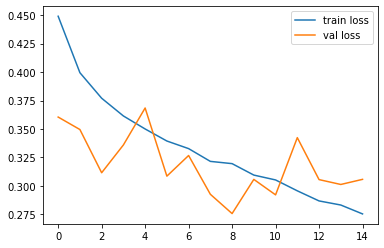

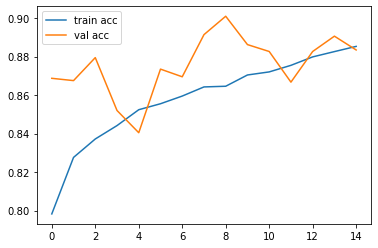

<Figure size 432x288 with 0 Axes>

In [62]:
plt.plot(model_4.history['loss'], label='train loss')
plt.plot(model_4.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_4.history['accuracy'], label='train acc')
plt.plot(model_4.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [63]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
count = 0
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_4.predict(test_image)
    y_test.append('O')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')

d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_4.predict(test_image)
    y_test.append('R')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')
        

[[0.00516078]]
[[0.00264883]]
[[7.361311e-05]]
[[0.14135134]]
[[0.02342519]]
[[0.20472205]]
[[0.22881022]]
[[0.09877563]]
[[0.00368956]]
[[0.00512433]]
[[0.5654332]]
[[0.00479791]]
[[0.8758391]]
[[0.03133458]]
[[0.0755465]]
[[0.17334712]]
[[0.43039152]]
[[0.00544071]]
[[0.0058319]]
[[0.40331805]]
[[0.59289366]]
[[0.01381376]]
[[0.01073065]]
[[0.01822415]]
[[0.01828438]]
[[0.08128563]]
[[0.03463781]]
[[0.0001688]]
[[0.00018424]]
[[0.3306089]]
[[0.00122145]]
[[0.19734982]]
[[0.07133427]]
[[0.05151245]]
[[0.13276973]]
[[0.00022018]]
[[0.02498028]]
[[0.00094578]]
[[0.84225523]]
[[0.00322595]]
[[0.12431717]]
[[0.89119565]]
[[0.05030057]]
[[0.05123293]]
[[0.03122875]]
[[0.26998168]]
[[0.26700115]]
[[0.00418371]]
[[0.02785268]]
[[0.01262563]]
[[0.00382864]]
[[0.00027239]]
[[0.08107856]]
[[0.3448721]]
[[0.09169704]]
[[0.06056976]]
[[0.00749791]]
[[0.0020017]]
[[0.09141073]]
[[0.06942904]]
[[0.04706022]]
[[0.0089303]]
[[0.07208505]]
[[0.45956826]]
[[0.06060553]]
[[0.00104868]]
[[0.03630668]]
[[

[[0.67064244]]
[[0.6243834]]
[[0.8731343]]
[[0.7476941]]
[[0.00323349]]
[[0.01925516]]
[[0.15195373]]
[[0.50039303]]
[[0.51557297]]
[[0.32806596]]
[[0.922827]]
[[0.02405995]]
[[0.02172729]]
[[0.31595695]]
[[0.0661588]]
[[0.01773801]]
[[0.00542572]]
[[0.00995708]]
[[0.69106686]]
[[0.17499751]]
[[0.00749242]]
[[0.1092678]]
[[0.2638074]]
[[0.00036067]]
[[0.6793085]]
[[0.06560522]]
[[0.21115473]]
[[0.01265863]]
[[0.7692579]]
[[0.01203391]]
[[0.5318641]]
[[0.04094484]]
[[0.03840333]]
[[0.14172286]]
[[0.00565815]]
[[0.32566768]]
[[0.00104788]]
[[0.2856028]]
[[0.05173913]]
[[0.05225143]]
[[0.24824736]]
[[0.27607477]]
[[0.01305237]]
[[0.05465406]]
[[0.4694542]]
[[0.03611198]]
[[0.01783279]]
[[0.02011049]]
[[0.00126782]]
[[0.00069073]]
[[0.22350892]]
[[0.05669495]]
[[0.04938704]]
[[0.01834932]]
[[0.13787696]]
[[0.05160829]]
[[0.02928659]]
[[0.15961039]]
[[0.28784293]]
[[0.01580739]]
[[0.35295337]]
[[0.0508408]]
[[0.00377938]]
[[0.0139291]]
[[0.53294855]]
[[0.00834915]]
[[0.2300641]]
[[0.0180401

[[0.04427332]]
[[0.9994745]]
[[0.8063412]]
[[0.01455605]]
[[0.15741217]]
[[0.26699674]]
[[0.3216799]]
[[0.19107983]]
[[0.00706074]]
[[0.1022155]]
[[0.00508109]]
[[0.15075243]]
[[0.01241118]]
[[0.17090201]]
[[0.01427761]]
[[0.00018683]]
[[0.09292448]]
[[0.3531822]]
[[0.00383317]]
[[0.01727507]]
[[0.05031756]]
[[0.12577507]]
[[0.02430958]]
[[0.39190546]]
[[0.12002254]]
[[0.01657981]]
[[0.02609438]]
[[0.48195478]]
[[0.03124854]]
[[0.12290341]]
[[0.11377776]]
[[0.0012244]]
[[0.02867663]]
[[0.0171625]]
[[0.00984851]]
[[0.25558183]]
[[0.08020097]]
[[0.05968013]]
[[0.235531]]
[[0.00026831]]
[[0.26027784]]
[[0.3242134]]
[[0.03368706]]
[[0.12176302]]
[[0.03040335]]
[[0.0230028]]
[[0.33112884]]
[[0.08220363]]
[[0.30362794]]
[[0.00778678]]
[[0.8610493]]
[[0.19584751]]
[[0.20968461]]
[[0.1289112]]
[[0.01088142]]
[[0.00160161]]
[[0.5691065]]
[[0.8363749]]
[[0.12501386]]
[[0.6362071]]
[[0.00116456]]
[[0.00423649]]
[[0.14840332]]
[[0.006787]]
[[0.5541224]]
[[0.5459002]]
[[0.23611292]]
[[0.01197755]]


[[0.36915138]]
[[0.3594888]]
[[0.97116786]]
[[0.8442633]]
[[0.9952459]]
[[0.9824568]]
[[0.944036]]
[[0.9937395]]
[[0.9941875]]
[[0.83508587]]
[[0.9771307]]
[[0.99725217]]
[[0.9877204]]
[[0.4009498]]
[[0.97090185]]
[[0.7608274]]
[[0.99146116]]
[[0.96223944]]
[[0.9996532]]
[[0.4790848]]
[[0.9829496]]
[[0.9018078]]
[[0.9692637]]
[[0.7042699]]
[[0.8576612]]
[[0.8947774]]
[[0.9518044]]
[[0.9534097]]
[[0.9924482]]
[[0.58379054]]
[[0.9673966]]
[[0.77454364]]
[[0.8836422]]
[[0.9644483]]
[[0.9319201]]
[[0.9801602]]
[[0.99543834]]
[[0.99419016]]
[[0.9980115]]
[[0.98908657]]
[[0.9860846]]
[[0.9648504]]
[[0.6117263]]
[[0.94668245]]
[[0.99995625]]
[[0.97395575]]
[[0.92693365]]
[[0.9999959]]
[[0.98313195]]
[[0.9857101]]
[[0.9078299]]
[[0.99746275]]
[[0.9941071]]
[[0.6173426]]
[[0.99475753]]
[[0.9999989]]
[[0.903646]]
[[0.9999392]]
[[0.99570334]]
[[0.99771315]]
[[0.9864249]]
[[0.98165894]]
[[0.8963566]]
[[0.9382465]]
[[0.98358935]]
[[0.9792192]]
[[0.91190803]]
[[0.99447656]]
[[0.99967253]]
[[0.991551

[[0.930205]]
[[0.8735906]]
[[0.9739244]]
[[0.9972463]]
[[0.91386294]]
[[0.9848999]]
[[0.5162521]]
[[0.8072114]]
[[0.97948533]]
[[0.9887309]]
[[0.91084826]]
[[0.9777496]]
[[0.99997514]]
[[0.94746953]]
[[0.98549086]]
[[0.93622446]]
[[0.9460547]]
[[0.9805722]]
[[0.01433694]]
[[0.07061806]]
[[0.8618159]]
[[0.94176245]]
[[0.87093997]]
[[0.8364225]]
[[0.46051994]]
[[0.98788166]]
[[0.9984213]]
[[0.8603446]]
[[0.9900732]]
[[0.742761]]
[[0.9880712]]
[[0.9674235]]
[[0.90192866]]
[[0.8720343]]
[[0.9918742]]
[[0.98128855]]
[[0.9949424]]
[[0.95523536]]
[[0.99907464]]
[[0.99683034]]
[[0.9893143]]
[[0.9976047]]
[[0.9257828]]
[[0.88889503]]
[[0.99831986]]
[[0.97451866]]
[[0.966483]]
[[0.44372046]]
[[0.98228955]]
[[0.9885802]]
[[0.9140541]]
[[0.9863968]]
[[0.7219673]]
[[0.99796903]]
[[0.9871955]]
[[0.98626137]]
[[0.83558977]]
[[0.93422616]]
[[0.9906887]]
[[0.99478316]]
[[0.9985956]]
[[0.8322181]]
[[0.676314]]
[[0.99965155]]
[[0.93444]]
[[0.8738834]]
[[0.01872793]]
[[0.99923384]]
[[0.7242003]]
[[0.92890

In [64]:
Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_4 = cm(Y_test,Y_pred)

print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_4

(2513,)
(2513,)


array([[1231,  170],
       [ 123,  989]], dtype=int64)

In [3]:
(1231+989)/2513

0.8834062873060088

In [66]:
#5th model (light category)

# Initialising the CNN
cnn_5 = tf.keras.models.Sequential()
cnn_5.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn_5.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn_5.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_5.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_5.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_5.add(Dense(1, activation='sigmoid'))

cnn_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model_5 = cnn_5.fit(x=training_set, validation_data = test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 83s 116ms/step - loss: 0.4777 - accuracy: 0.7779 - val_loss: 0.4058 - val_accuracy: 0.8281
Epoch 2/15
706/706 [==============================] - 72s 101ms/step - loss: 0.4011 - accuracy: 0.8246 - val_loss: 0.3535 - val_accuracy: 0.8548
Epoch 3/15
706/706 [==============================] - 69s 98ms/step - loss: 0.3766 - accuracy: 0.8349 - val_loss: 0.3216 - val_accuracy: 0.8687
Epoch 4/15
706/706 [==============================] - 69s 97ms/step - loss: 0.3642 - accuracy: 0.8390 - val_loss: 0.3640 - val_accuracy: 0.8643
Epoch 5/15
706/706 [==============================] - 71s 100ms/step - loss: 0.3459 - accuracy: 0.8506 - val_loss: 0.3385 - val_accuracy: 0.8671
Epoch 6/15
706/706 [==============================] - 76s 107ms/step - loss: 0.3399 - accuracy: 0.8546 - val_loss: 0.3166 - val_accuracy: 0.8810
Epoch 7/15
706/706 [==============================] - 73s 104ms/step - loss: 0.3309 - accuracy: 0.8582 - val_loss: 0.3431 - val_accu

In [68]:
cnn_5.summary()
cnn_5.save('model_5.h5')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

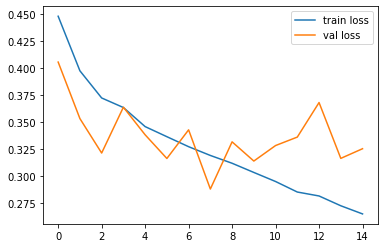

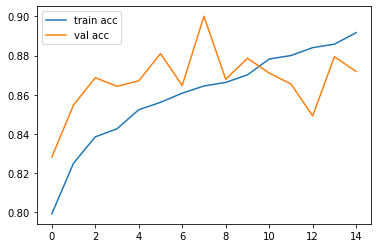

<Figure size 432x288 with 0 Axes>

In [69]:
plt.plot(model_5.history['loss'], label='train loss')
plt.plot(model_5.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_5.history['accuracy'], label='train acc')
plt.plot(model_5.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [70]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
count = 0
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_5.predict(test_image)
    y_test.append('O')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')

d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(64,64))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_5.predict(test_image)
    y_test.append('R')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')

Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_5 = cm(Y_test,Y_pred)

print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_5
        

[[0.00257406]]
[[0.03499988]]
[[0.0003041]]
[[0.06350634]]
[[0.00630021]]
[[0.09509793]]
[[0.4292894]]
[[0.06859162]]
[[0.00077963]]
[[0.01296082]]
[[0.33533216]]
[[0.03227729]]
[[0.87410843]]
[[0.06679109]]
[[0.03330207]]
[[0.35924953]]
[[0.7938247]]
[[0.00302851]]
[[0.02439085]]
[[0.15887675]]
[[0.21336049]]
[[0.00433543]]
[[0.02197468]]
[[0.04435325]]
[[0.06082705]]
[[0.02311707]]
[[0.00820568]]
[[0.00282297]]
[[0.00371307]]
[[0.14622718]]
[[0.01042372]]
[[0.2009832]]
[[0.03489536]]
[[0.00643364]]
[[0.0191209]]
[[0.0014919]]
[[0.09131801]]
[[0.00146464]]
[[0.82531583]]
[[0.00470304]]
[[0.13303185]]
[[0.1732527]]
[[0.02506441]]
[[0.07119855]]
[[0.06252775]]
[[0.46572274]]
[[0.05992019]]
[[0.03508192]]
[[0.08897355]]
[[0.01337254]]
[[0.01713192]]
[[0.00144306]]
[[0.01563314]]
[[0.37070003]]
[[0.0909085]]
[[0.01252887]]
[[0.05213204]]
[[0.00738499]]
[[0.02389386]]
[[0.28638518]]
[[0.03439674]]
[[0.01223558]]
[[0.01890856]]
[[0.22333351]]
[[0.03570718]]
[[0.00441182]]
[[0.04391187]]
[[0

[[0.6782]]
[[0.8039827]]
[[0.35003516]]
[[0.32185173]]
[[0.45347032]]
[[0.02857092]]
[[0.02758899]]
[[0.26956153]]
[[0.7003639]]
[[0.04737452]]
[[0.21207824]]
[[0.9804857]]
[[0.04492369]]
[[0.00801513]]
[[0.11195439]]
[[0.03921175]]
[[0.01117241]]
[[0.00473511]]
[[0.04374874]]
[[0.48700112]]
[[0.22200224]]
[[0.03131616]]
[[0.1676619]]
[[0.03627577]]
[[0.00145665]]
[[0.5766065]]
[[0.03244749]]
[[0.01508081]]
[[0.02531075]]
[[0.7140072]]
[[0.03220871]]
[[0.25449985]]
[[0.02546203]]
[[0.03122929]]
[[0.04640654]]
[[0.02642283]]
[[0.67115676]]
[[0.00457007]]
[[0.22252008]]
[[0.01859713]]
[[0.10327154]]
[[0.43272194]]
[[0.03187925]]
[[0.03210998]]
[[0.1836811]]
[[0.33530748]]
[[0.01247945]]
[[0.01283878]]
[[0.00281528]]
[[0.00371149]]
[[0.00187021]]
[[0.09544954]]
[[0.00356966]]
[[0.01874128]]
[[0.12106389]]
[[0.26687467]]
[[0.03754348]]
[[0.17140368]]
[[0.08255437]]
[[0.21658581]]
[[0.05526468]]
[[0.64412177]]
[[0.07703638]]
[[0.0009397]]
[[0.00906697]]
[[0.28358185]]
[[0.02345917]]
[[0.120

[[0.03217205]]
[[0.9988996]]
[[0.13998425]]
[[0.00368974]]
[[0.13804662]]
[[0.11804846]]
[[0.23296794]]
[[0.00728774]]
[[0.00541207]]
[[0.09453592]]
[[0.04651257]]
[[0.08147866]]
[[0.00695547]]
[[0.19060302]]
[[0.0126442]]
[[0.00526586]]
[[0.07597771]]
[[0.24201518]]
[[0.0006482]]
[[0.01230335]]
[[0.1262387]]
[[0.40575814]]
[[0.01990071]]
[[0.5034933]]
[[0.21298629]]
[[0.02743524]]
[[0.01687542]]
[[0.12858844]]
[[0.11284712]]
[[0.06624338]]
[[0.1808052]]
[[0.04351276]]
[[0.00863877]]
[[0.01336551]]
[[0.0010691]]
[[0.3128733]]
[[0.02182913]]
[[0.2743352]]
[[0.3090257]]
[[0.00171646]]
[[0.3517394]]
[[0.09936053]]
[[0.02162063]]
[[0.17388824]]
[[0.06398416]]
[[0.05793041]]
[[0.37750807]]
[[0.09586281]]
[[0.16939199]]
[[0.01212886]]
[[0.9052938]]
[[0.08021894]]
[[0.10071856]]
[[0.04588807]]
[[0.1132856]]
[[0.00616217]]
[[0.51635194]]
[[0.778755]]
[[0.05440366]]
[[0.06951633]]
[[0.00819606]]
[[0.00769216]]
[[0.39460754]]
[[0.00340739]]
[[0.36384246]]
[[0.3441916]]
[[0.369528]]
[[0.01176122]

[[0.99656326]]
[[0.9632124]]
[[0.97183573]]
[[0.97155225]]
[[0.9907882]]
[[0.9870516]]
[[0.9989017]]
[[0.8398019]]
[[0.92876816]]
[[0.98607945]]
[[0.86166835]]
[[0.47955868]]
[[0.99963486]]
[[0.55319774]]
[[0.9953741]]
[[0.9856149]]
[[0.99969983]]
[[0.595641]]
[[0.9969225]]
[[0.85139227]]
[[0.9786707]]
[[0.7572469]]
[[0.83927876]]
[[0.9862638]]
[[0.95422447]]
[[0.98913455]]
[[0.9631413]]
[[0.69088984]]
[[0.9862368]]
[[0.70202833]]
[[0.93780845]]
[[0.9523363]]
[[0.934881]]
[[0.95414525]]
[[0.9341788]]
[[0.9705385]]
[[0.995234]]
[[0.9768126]]
[[0.9750142]]
[[0.9631857]]
[[0.622479]]
[[0.8173749]]
[[0.9995016]]
[[0.9922956]]
[[0.8438208]]
[[0.9999992]]
[[0.98387146]]
[[0.9084023]]
[[0.89082384]]
[[0.9962762]]
[[0.9967]]
[[0.7795483]]
[[0.9294378]]
[[0.99999917]]
[[0.9469894]]
[[0.9992534]]
[[0.99372274]]
[[0.9955692]]
[[0.9812418]]
[[0.886395]]
[[0.7935951]]
[[0.81147385]]
[[0.94940567]]
[[0.98075074]]
[[0.77220404]]
[[0.9992196]]
[[0.99999845]]
[[0.95673966]]
[[0.9719881]]
[[0.95036197]]

[[0.9847026]]
[[0.7927679]]
[[0.9967352]]
[[0.7150161]]
[[0.94546854]]
[[0.87525094]]
[[0.954743]]
[[0.9736451]]
[[0.7961682]]
[[0.9999989]]
[[0.9777119]]
[[0.9569748]]
[[0.95140696]]
[[0.64068115]]
[[0.99900234]]
[[0.00428659]]
[[0.47135457]]
[[0.92852783]]
[[0.9432099]]
[[0.79081297]]
[[0.83872557]]
[[0.68716514]]
[[0.8891883]]
[[0.9998458]]
[[0.9037238]]
[[0.79963934]]
[[0.70697904]]
[[0.8983033]]
[[0.93878984]]
[[0.7742758]]
[[0.98149824]]
[[0.9892813]]
[[0.89128184]]
[[0.9910213]]
[[0.99020696]]
[[0.9952917]]
[[0.97806454]]
[[0.9187531]]
[[0.97975546]]
[[0.98363143]]
[[0.9138135]]
[[0.99856186]]
[[0.94011354]]
[[0.8534504]]
[[0.7915453]]
[[0.9724743]]
[[0.98004234]]
[[0.98484164]]
[[0.9866017]]
[[0.9977277]]
[[0.99926275]]
[[0.68697846]]
[[0.99999696]]
[[0.8768944]]
[[0.9523325]]
[[0.9345561]]
[[0.9852864]]
[[0.99688554]]
[[0.95468295]]
[[0.832615]]
[[0.99620795]]
[[0.8798983]]
[[0.4124901]]
[[0.04453495]]
[[0.9999877]]
[[0.8915199]]
[[0.95790845]]
[[0.9828155]]
[[0.09773546]]
[[0

array([[1223,  178],
       [ 144,  968]], dtype=int64)

In [71]:
(1223+968)/2513

0.871866295264624

In [10]:
train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

xception = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


# don't train existing weights
for layer in xception.layers:
  layer.trainable = False

In [9]:
import os
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

In [12]:
from keras.models import Model
# useful for getting number of classes
folders = glob('DATASET/TRAIN/*')
  

# our layers - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [13]:
model_Xception = model.fit_generator(training_set, validation_data = test_set, epochs=15)

C:\Users\ROBO_UNKNOWN\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
706/706 [==============================] - 1121s 2s/step - loss: 0.6427 - accuracy: 0.7328 - val_loss: 0.5835 - val_accuracy: 0.6311
Epoch 2/15
706/706 [==============================] - 1160s 2s/step - loss: 0.5035 - accuracy: 0.8452 - val_loss: 0.5139 - val_accuracy: 0.6948
Epoch 3/15
706/706 [==============================] - 1170s 2s/step - loss: 0.4167 - accuracy: 0.8688 - val_loss: 0.4700 - val_accuracy: 0.7103
Epoch 4/15
706/706 [==============================] - 1178s 2s/step - loss: 0.3601 - accuracy: 0.8792 - val_loss: 0.4457 - val_accuracy: 0.7203
Epoch 5/15
706/706 [==============================] - 1129s 2s/step - loss: 0.3349 - accuracy: 0.8724 - val_loss: 0.4309 - val_accuracy: 0.7254
Epoch 6/15
706/706 [==============================] - 1163s 2s/step - loss: 0.3133 - accuracy: 0.8782 - val_loss: 0.4224 - val_accuracy: 0.7302
Epoch 7/15
706/706 [==============================] - 1103s 2s/step - loss: 0.2980 - accuracy: 0.8813 - val_loss: 0.4178 - val_accuracy:

In [18]:
from tensorflow.keras.models import load_model
model_Xception.save('model_Xception.h5')

AttributeError: 'History' object has no attribute 'save'

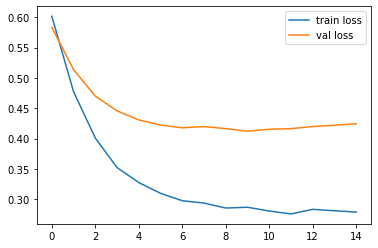

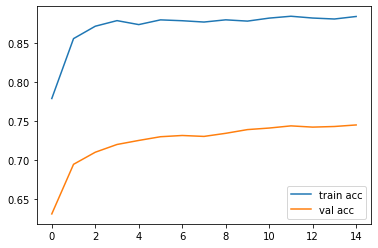

<Figure size 432x288 with 0 Axes>

In [17]:

plt.plot(model_Xception.history['loss'], label='train loss')
plt.plot(model_Xception.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_Xception.history['accuracy'], label='train acc')
plt.plot(model_Xception.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
#6th model (heavy category)

# Initialising the CNN
cnn_6 = tf.keras.models.Sequential()
cnn_6.add(tf.keras.layers.Conv2D(filters=512,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn_6.add(tf.keras.layers.Conv2D(filters=256,padding="same",kernel_size=3, activation='relu'))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_6.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu'))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_6.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu'))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_6.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_6.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn_6.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_6.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn_6.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_6.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_6.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn_6.add(Dense(1, activation='sigmoid'))

cnn_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model_6 = cnn_6.fit(x=training_set, validation_data = test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2626s 4s/step - loss: 0.5157 - accuracy: 0.7451 - val_loss: 0.4048 - val_accuracy: 0.8436
Epoch 2/15
706/706 [==============================] - 2702s 4s/step - loss: 0.4252 - accuracy: 0.8118 - val_loss: 0.3881 - val_accuracy: 0.8464
Epoch 3/15
706/706 [==============================] - 2872s 4s/step - loss: 0.3905 - accuracy: 0.8337 - val_loss: 0.2608 - val_accuracy: 0.9053
Epoch 4/15
706/706 [==============================] - 2600s 4s/step - loss: 0.3593 - accuracy: 0.8477 - val_loss: 0.2795 - val_accuracy: 0.9117
Epoch 5/15
706/706 [==============================] - 2602s 4s/step - loss: 0.3448 - accuracy: 0.8573 - val_loss: 0.3174 - val_accuracy: 0.8842
Epoch 6/15
706/706 [==============================] - 2603s 4s/step - loss: 0.3286 - accuracy: 0.8633 - val_loss: 0.2501 - val_accuracy: 0.9164
Epoch 7/15
706/706 [==============================] - 2605s 4s/step - loss: 0.3130 - accuracy: 0.8734 - val_loss: 0.2668 - val_accuracy:

In [20]:
cnn_6.save('model_6.h5')

In [4]:
cnn_heavy = load_model('model_6.h5')

In [6]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
count = 0
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_heavy.predict(test_image)
    y_test.append('O')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')

d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_heavy.predict(test_image)
    y_test.append('R')
    print(res)
    if(res[0][0]>0.5):
        y_pred.append('R')
    else:
        y_pred.append('O')

Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_6 = cm(Y_test,Y_pred)

print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_6

[[0.00323409]]
[[0.00048888]]
[[0.00062352]]
[[0.04139918]]
[[0.04656312]]
[[0.03753996]]
[[0.03159058]]
[[0.00638825]]
[[0.00462186]]
[[0.00394484]]
[[0.02148917]]
[[0.00282028]]
[[0.6457375]]
[[0.00120568]]
[[0.0470846]]
[[0.04493862]]
[[0.2284944]]
[[0.00051305]]
[[0.0106464]]
[[0.01214135]]
[[0.16670951]]
[[0.02339879]]
[[0.00607559]]
[[0.30983877]]
[[0.08379343]]
[[0.01773438]]
[[0.00065586]]
[[0.00904205]]
[[0.00703603]]
[[0.00590643]]
[[0.01493427]]
[[0.00513923]]
[[0.01368812]]
[[0.01594666]]
[[0.0194931]]
[[0.00081724]]
[[0.0315302]]
[[0.00294432]]
[[0.4170742]]
[[0.02399954]]
[[0.06564549]]
[[0.21527603]]
[[0.01350611]]
[[0.00860271]]
[[0.00172573]]
[[0.3276842]]
[[0.03024372]]
[[0.00315109]]
[[0.00176251]]
[[0.0228647]]
[[0.00544098]]
[[0.0041863]]
[[0.04033101]]
[[0.2463342]]
[[0.00737453]]
[[0.00014493]]
[[0.00218052]]
[[0.00184572]]
[[0.00751126]]
[[0.05625775]]
[[0.04233867]]
[[0.00143775]]
[[0.00914708]]
[[0.35686103]]
[[0.01526701]]
[[0.00018916]]
[[0.00961488]]
[[0.00

[[0.02530354]]
[[0.7481604]]
[[0.00134841]]
[[0.01463252]]
[[0.7692516]]
[[0.21821812]]
[[0.48200142]]
[[0.58349484]]
[[0.00159431]]
[[0.00160277]]
[[0.01614255]]
[[0.55998707]]
[[0.07035857]]
[[0.01963353]]
[[0.8253296]]
[[0.00066024]]
[[0.00035009]]
[[0.00829044]]
[[0.0081284]]
[[0.00720093]]
[[0.00162786]]
[[0.00084957]]
[[0.05531254]]
[[0.16330814]]
[[0.00092316]]
[[0.05399936]]
[[0.02490756]]
[[0.00016326]]
[[0.13982311]]
[[0.02023643]]
[[0.00213102]]
[[0.00468624]]
[[0.20332018]]
[[0.00376657]]
[[0.1328609]]
[[0.00156671]]
[[0.00164938]]
[[0.00872478]]
[[0.00933155]]
[[0.22016323]]
[[0.00033203]]
[[0.08270523]]
[[0.00301638]]
[[0.00424176]]
[[0.03308344]]
[[0.02554357]]
[[0.00157556]]
[[0.08123046]]
[[0.0644221]]
[[0.00344533]]
[[0.00194681]]
[[0.00913352]]
[[0.00166315]]
[[0.00146621]]
[[0.02247033]]
[[0.00405458]]
[[0.0100067]]
[[0.00831744]]
[[0.05870089]]
[[0.00377762]]
[[0.04151288]]
[[0.03036436]]
[[0.0211198]]
[[0.02083227]]
[[0.37965804]]
[[0.0124571]]
[[7.998496e-05]]
[[

[[0.03509974]]
[[0.00673205]]
[[0.00204661]]
[[0.00050512]]
[[0.03472242]]
[[0.00051662]]
[[0.00413334]]
[[0.01370746]]
[[0.0202246]]
[[0.03707567]]
[[9.021404e-06]]
[[0.03598368]]
[[0.00987643]]
[[0.00430542]]
[[0.00122231]]
[[0.85099864]]
[[0.07630244]]
[[0.01253396]]
[[0.04951164]]
[[0.07940936]]
[[0.0770973]]
[[0.00401244]]
[[0.0044004]]
[[0.44164124]]
[[0.00380054]]
[[0.04028976]]
[[0.00746194]]
[[0.01963478]]
[[0.00636005]]
[[0.00091073]]
[[0.08418193]]
[[0.28051913]]
[[0.00011168]]
[[0.0104582]]
[[0.1733957]]
[[0.11923021]]
[[0.00549594]]
[[0.08508906]]
[[0.1041671]]
[[0.00854707]]
[[0.00185081]]
[[0.12835488]]
[[0.01819408]]
[[0.07890022]]
[[0.02227259]]
[[0.00273874]]
[[0.00038803]]
[[0.01748225]]
[[0.02540404]]
[[0.0809305]]
[[0.06850132]]
[[0.0285815]]
[[0.04979298]]
[[0.00030246]]
[[0.38500825]]
[[0.06995276]]
[[0.00084528]]
[[0.21010974]]
[[0.00504526]]
[[0.00654966]]
[[0.20634049]]
[[0.07852077]]
[[0.01349881]]
[[0.00751588]]
[[0.24966496]]
[[0.16329694]]
[[0.00995633]]
[

[[0.99193764]]
[[0.97773266]]
[[0.97796786]]
[[0.9833987]]
[[0.87625194]]
[[0.96548915]]
[[0.993304]]
[[0.9109485]]
[[0.9815156]]
[[0.87679416]]
[[0.96078384]]
[[0.98508]]
[[0.9844755]]
[[0.97199816]]
[[0.98571444]]
[[0.92021835]]
[[0.61459273]]
[[0.16322991]]
[[0.98803866]]
[[0.95545286]]
[[0.99417305]]
[[0.9845159]]
[[0.9639996]]
[[0.9655697]]
[[0.98936194]]
[[0.9581115]]
[[0.9167401]]
[[0.97456974]]
[[0.97390676]]
[[0.80239207]]
[[0.9848281]]
[[0.97890306]]
[[0.9540073]]
[[0.939474]]
[[0.98719394]]
[[0.9439223]]
[[0.89493793]]
[[0.9751047]]
[[0.9742743]]
[[0.85991645]]
[[0.965971]]
[[0.9741964]]
[[0.96297795]]
[[0.982677]]
[[0.9849921]]
[[0.72699076]]
[[0.96884537]]
[[0.6717561]]
[[0.9067688]]
[[0.99001914]]
[[0.73766625]]
[[0.8500571]]
[[0.9563664]]
[[0.9726928]]
[[0.97595066]]
[[0.97983783]]
[[0.9770236]]
[[0.94373155]]
[[0.9128796]]
[[0.99714184]]
[[0.988199]]
[[0.98293513]]
[[0.98355865]]
[[0.99854505]]
[[0.9353253]]
[[0.8058007]]
[[0.96695095]]
[[0.96136534]]
[[0.99326456]]
[[0

[[0.9242617]]
[[0.9807983]]
[[0.9024481]]
[[0.23871917]]
[[0.83824885]]
[[0.3704686]]
[[0.98574513]]
[[0.04917064]]
[[0.9550687]]
[[0.93475664]]
[[0.94358027]]
[[0.41726753]]
[[0.5001597]]
[[0.9137022]]
[[0.4622049]]
[[0.99656844]]
[[0.98438334]]
[[0.9805299]]
[[0.9831644]]
[[0.84056205]]
[[0.98975915]]
[[0.7549716]]
[[0.98503256]]
[[0.61448497]]
[[0.962305]]
[[0.7995672]]
[[0.886287]]
[[0.9842996]]
[[0.9828745]]
[[0.92330515]]
[[0.9836147]]
[[0.9192983]]
[[0.9748057]]
[[0.98317194]]
[[0.48957804]]
[[0.8445963]]
[[0.9942322]]
[[0.09868193]]
[[0.2753205]]
[[0.9447683]]
[[0.9153885]]
[[0.8039671]]
[[0.95830774]]
[[0.30291268]]
[[0.9395541]]
[[0.7739428]]
[[0.8851786]]
[[0.98450935]]
[[0.8719561]]
[[0.8915044]]
[[0.89805377]]
[[0.9163907]]
[[0.8756839]]
[[0.98574865]]
[[0.99628556]]
[[0.92524374]]
[[0.9908376]]
[[0.99920154]]
[[0.9936397]]
[[0.9736421]]
[[0.95590496]]
[[0.960415]]
[[0.89136946]]
[[0.9693376]]
[[0.9813752]]
[[0.9805798]]
[[0.96599853]]
[[0.96648973]]
[[0.97646797]]
[[0.981

array([[1366,   35],
       [ 160,  952]], dtype=int64)

In [8]:
(1366+952)/2513

0.9224035017906884

In [10]:
IMAGE_SIZE = [224, 224]

train_path = 'DATASET/TRAIN'
valid_path = 'DATASET/TEST'

resnet152 = tf.keras.applications.ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in resnet152.layers:
  layer.trainable = False

In [13]:
from keras.models import Model
x = Flatten()(resnet152.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model_resnet512 = Model(inputs=resnet152.input, outputs=prediction)

model_resnet512.summary()


model_resnet512.compile(
  loss='categorical_crossentropy',
  optimizer='RMSProp',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
model_resnet512.fit(training_set, validation_data=test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 2712s 4s/step - loss: 4.1003 - accuracy: 0.5648 - val_loss: 1.4222 - val_accuracy: 0.6944
Epoch 2/15
706/706 [==============================] - 2814s 4s/step - loss: 3.1941 - accuracy: 0.6160 - val_loss: 3.2981 - val_accuracy: 0.6088
Epoch 3/15
706/706 [==============================] - 3013s 4s/step - loss: 2.9985 - accuracy: 0.6369 - val_loss: 4.1879 - val_accuracy: 0.4906
Epoch 4/15
706/706 [==============================] - 2885s 4s/step - loss: 3.0030 - accuracy: 0.6385 - val_loss: 1.1490 - val_accuracy: 0.7764
Epoch 5/15
706/706 [==============================] - 2901s 4s/step - loss: 2.8665 - accuracy: 0.6525 - val_loss: 4.2443 - val_accuracy: 0.5977
Epoch 6/15
706/706 [==============================] - 2980s 4s/step - loss: 2.8070 - accuracy: 0.6523 - val_loss: 2.0924 - val_accuracy: 0.6637
Epoch 7/15
706/706 [==============================] - 2970s 4s/step - loss: 2.7241 - accuracy: 0.6647 - val_loss: 1.4042 - val_accuracy:

In [15]:
model_resnet512.save('model_resnet512.h5')

In [13]:
#7th model (med category)

# Initialising the CNN
cnn_7 = tf.keras.models.Sequential()
cnn_7.add(tf.keras.layers.Conv2D(filters=128,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_7.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_7.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_7.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn_7.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn_7.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn_7.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn_7.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn_7.add(tf.keras.layers.Dense(units=16, activation='relu'))
cnn_7.add(Dense(1, activation='sigmoid'))

cnn_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model_7 = cnn_7.fit(x=training_set, validation_data = test_set, epochs=15)

Epoch 1/15
706/706 [==============================] - 69s 97ms/step - loss: 0.5066 - accuracy: 0.7432 - val_loss: 0.4273 - val_accuracy: 0.8281
Epoch 2/15
706/706 [==============================] - 68s 96ms/step - loss: 0.4233 - accuracy: 0.8147 - val_loss: 0.3373 - val_accuracy: 0.8655
Epoch 3/15
706/706 [==============================] - 70s 99ms/step - loss: 0.3915 - accuracy: 0.8302 - val_loss: 0.3514 - val_accuracy: 0.8631
Epoch 4/15
706/706 [==============================] - 71s 101ms/step - loss: 0.3711 - accuracy: 0.8368 - val_loss: 0.3192 - val_accuracy: 0.8731
Epoch 5/15
706/706 [==============================] - 70s 99ms/step - loss: 0.3616 - accuracy: 0.8458 - val_loss: 0.3298 - val_accuracy: 0.8731
Epoch 6/15
706/706 [==============================] - 70s 99ms/step - loss: 0.3454 - accuracy: 0.8505 - val_loss: 0.2981 - val_accuracy: 0.8922
Epoch 7/15
706/706 [==============================] - 73s 103ms/step - loss: 0.3312 - accuracy: 0.8579 - val_loss: 0.2779 - val_accurac

In [15]:
cnn_7.save('model_7.h5')

In [6]:
cnn_restnet = load_model('model_resnet512.h5')

In [8]:
y_pred = []
y_test = []
d = 'DATASET/TEST/O/O_'
ext = '.jpg'
count = 0
for i in range(12568,13969):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_restnet.predict(test_image)
    y_test.append('O')
    print(res)
    if(res[0][0]>res[0][1]):
        y_pred.append('O')
    else:
        y_pred.append('R')

d = 'DATASET/TEST/R/R_'
ext = '.jpg'
for i in range(10000,11112):
    path = f'{d}{i}{ext}'
    #print(path)
    test_image = image.load_img(path, target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    res = cnn_restnet.predict(test_image)
    y_test.append('R')
    print(res)
    if(res[0][0]>res[0][1]):
        y_pred.append('O')
    else:
        y_pred.append('R')

Y_pred = np.array(y_pred)
Y_test = np.array(y_test)
cm_CNN_model_6 = cm(Y_test,Y_pred)

print(Y_pred.shape)
print(Y_test.shape)
cm_CNN_model_6

[[0.9859605  0.01403951]]
[[0.9947194  0.00528062]]
[[0.6696636 0.3303364]]
[[9.9976176e-01 2.3825190e-04]]
[[0.52873844 0.4712616 ]]
[[0.9723866  0.02761343]]
[[0.5852515  0.41474852]]
[[0.02244763 0.9775524 ]]
[[1.8941902e-04 9.9981064e-01]]
[[0.9972549  0.00274509]]
[[0.44074735 0.5592526 ]]
[[0.99639916 0.00360081]]
[[0.8267726  0.17322749]]
[[9.9999511e-01 4.9151067e-06]]
[[0.9862643  0.01373568]]
[[0.8751172  0.12488282]]
[[3.1642726e-04 9.9968362e-01]]
[[9.9968505e-01 3.1491226e-04]]
[[9.9996197e-01 3.8033188e-05]]
[[9.993018e-01 6.981981e-04]]
[[0.00468658 0.9953134 ]]
[[0.99896884 0.00103116]]
[[5.1109122e-08 1.0000000e+00]]
[[9.9983430e-01 1.6567393e-04]]
[[0.00675816 0.99324185]]
[[0.8625523  0.13744774]]
[[0.9759636  0.02403639]]
[[9.9995816e-01 4.1867479e-05]]
[[0.02424096 0.975759  ]]
[[0.9922996  0.00770038]]
[[0.7794616  0.22053844]]
[[0.0288858 0.9711142]]
[[0.14538671 0.8546133 ]]
[[0.3522744 0.6477256]]
[[9.9995029e-01 4.9675342e-05]]
[[9.9961215e-01 3.8785086e-04]]


[[9.9979562e-01 2.0444707e-04]]
[[0.01902059 0.9809794 ]]
[[0.9966838  0.00331617]]
[[1.0000000e+00 3.8487027e-08]]
[[0.9903949  0.00960506]]
[[9.9983382e-01 1.6620211e-04]]
[[0.92066854 0.07933142]]
[[0.99843925 0.00156074]]
[[0.15260693 0.84739304]]
[[9.999937e-01 6.364823e-06]]
[[9.9995613e-01 4.3813016e-05]]
[[9.9999380e-01 6.1679452e-06]]
[[9.9997246e-01 2.7538370e-05]]
[[9.999999e-01 8.081614e-08]]
[[1.0000000e+00 5.1576015e-09]]
[[0.9912403  0.00875968]]
[[9.9999893e-01 1.1278609e-06]]
[[0.7112646 0.2887354]]
[[1.000000e+00 7.628782e-09]]
[[0.9676853  0.03231472]]
[[0.5682437 0.4317563]]
[[0.00116151 0.9988385 ]]
[[0.00959441 0.9904056 ]]
[[9.9923909e-01 7.6089863e-04]]
[[1.7142943e-04 9.9982858e-01]]
[[0.9984487  0.00155123]]
[[9.9997771e-01 2.2348975e-05]]
[[0.07078493 0.9292151 ]]
[[9.999329e-01 6.708412e-05]]
[[1.00000e+00 2.05371e-12]]
[[0.99603975 0.00396024]]
[[1.0000000e+00 1.8260252e-09]]
[[1.0000000e+00 2.5740463e-10]]
[[1.0000000e+00 1.6140368e-12]]
[[0.8979486  0.102

[[9.9999964e-01 2.9957383e-07]]
[[0.625 0.375]]
[[0.00123688 0.9987631 ]]
[[9.9998653e-01 1.3524675e-05]]
[[0.93970656 0.06029345]]
[[0.9973603  0.00263968]]
[[9.9975818e-01 2.4178196e-04]]
[[9.9999225e-01 7.6953311e-06]]
[[0.7975426 0.2024574]]
[[9.9996483e-01 3.5200250e-05]]
[[9.9980050e-01 1.9953537e-04]]
[[9.9995017e-01 4.9789163e-05]]
[[9.9916923e-01 8.3084276e-04]]
[[0.7721715 0.2278285]]
[[9.9982172e-01 1.7835003e-04]]
[[0.10137347 0.89862657]]
[[9.999994e-01 5.984346e-07]]
[[0.9917144 0.0082856]]
[[0.8819014  0.11809863]]
[[9.9999869e-01 1.2756226e-06]]
[[0.9912374  0.00876257]]
[[0.99614525 0.00385468]]
[[9.9999356e-01 6.4862297e-06]]
[[0.7272186 0.2727814]]
[[0.9912378  0.00876213]]
[[0.9731056  0.02689447]]
[[9.9998236e-01 1.7630446e-05]]
[[9.9999928e-01 7.2264953e-07]]
[[9.999999e-01 7.153825e-08]]
[[9.9999046e-01 9.4856268e-06]]
[[0.6694032 0.3305968]]
[[0.9567661  0.04323383]]
[[0.9988801  0.00111996]]
[[1.0000000e+00 1.5931918e-09]]
[[0.07891744 0.9210825 ]]
[[9.9971253e

[[0.03481841 0.9651815 ]]
[[0.9885107 0.0114892]]
[[0.36353785 0.63646215]]
[[0.8297642  0.17023584]]
[[9.9943775e-01 5.6224054e-04]]
[[9.9963045e-01 3.6955142e-04]]
[[9.9944752e-01 5.5249524e-04]]
[[0.00138865 0.99861133]]
[[0.9678804  0.03211954]]
[[3.8291346e-06 9.9999619e-01]]
[[0.9664996 0.0335004]]
[[0.99900025 0.00099974]]
[[9.999914e-01 8.559674e-06]]
[[4.9421564e-04 9.9950576e-01]]
[[0.02350515 0.9764948 ]]
[[0.691369   0.30863106]]
[[0.91424036 0.08575966]]
[[0.00114928 0.9988507 ]]
[[9.9999273e-01 7.3028677e-06]]
[[9.9993014e-01 6.9855108e-05]]
[[0.77230686 0.22769316]]
[[0.9677256  0.03227443]]
[[0.7588938  0.24110617]]
[[0.9966543  0.00334569]]
[[1.0000000e+00 1.6581314e-08]]
[[0.21867986 0.78132015]]
[[0.97322863 0.02677138]]
[[9.9999905e-01 9.8789337e-07]]
[[2.287509e-05 9.999771e-01]]
[[9.9981004e-01 1.8993914e-04]]
[[9.9993956e-01 6.0480677e-05]]
[[0.9686128  0.03138721]]
[[0.00995558 0.9900445 ]]
[[0.99798775 0.00201225]]
[[9.9980420e-01 1.9585558e-04]]
[[9.998324e-01

[[9.9983871e-01 1.6121926e-04]]
[[0.72327095 0.27672902]]
[[0.9962011  0.00379888]]
[[0.20736176 0.79263824]]
[[0.84715545 0.1528445 ]]
[[0.9937028  0.00629713]]
[[9.9969065e-01 3.0932264e-04]]
[[9.9999857e-01 1.4474588e-06]]
[[0.7615245  0.23847552]]
[[0.06487935 0.93512064]]
[[9.9999750e-01 2.4862945e-06]]
[[0.10598256 0.89401746]]
[[9.9976283e-01 2.3721741e-04]]
[[0.96418786 0.03581217]]
[[0.99023753 0.00976246]]
[[9.994974e-01 5.025599e-04]]
[[0.44546708 0.55453295]]
[[0.99785835 0.00214161]]
[[0.9884015 0.0115985]]
[[0.748474   0.25152594]]
[[9.999714e-01 2.856165e-05]]
[[0.9974502  0.00254982]]
[[9.9987686e-01 1.2312261e-04]]
[[9.9999774e-01 2.3162754e-06]]
[[9.9999774e-01 2.2566931e-06]]
[[0.99871624 0.00128377]]
[[0.98017335 0.01982664]]
[[0.06653643 0.9334636 ]]
[[9.9999833e-01 1.6290890e-06]]
[[1.0000000e+00 2.7343388e-08]]
[[0.9820098 0.0179901]]
[[0.99817264 0.00182735]]
[[0.36037648 0.6396236 ]]
[[9.9999976e-01 1.8231972e-07]]
[[0.99237907 0.00762094]]
[[9.9999976e-01 2.46

[[0.04023097 0.95976907]]
[[0.00765034 0.9923497 ]]
[[7.152969e-11 1.000000e+00]]
[[2.7792968e-05 9.9997222e-01]]
[[1.4918517e-04 9.9985075e-01]]
[[0.01105331 0.98894674]]
[[5.2837066e-07 9.9999952e-01]]
[[9.811990e-05 9.999019e-01]]
[[1.0440284e-08 1.0000000e+00]]
[[6.4357615e-04 9.9935645e-01]]
[[0.0075077  0.99249226]]
[[0.03111641 0.96888363]]
[[6.786386e-08 9.999999e-01]]
[[8.666289e-06 9.999913e-01]]
[[8.113245e-08 9.999999e-01]]
[[8.09139e-09 1.00000e+00]]
[[0.00142957 0.99857044]]
[[1.9242464e-07 9.9999976e-01]]
[[1.9476801e-04 9.9980527e-01]]
[[2.9523229e-05 9.9997044e-01]]
[[2.6830373e-04 9.9973172e-01]]
[[2.7930486e-08 1.0000000e+00]]
[[1.8521656e-04 9.9981481e-01]]
[[2.5667750e-05 9.9997437e-01]]
[[4.5987126e-14 1.0000000e+00]]
[[4.9794503e-06 9.9999499e-01]]
[[1.8671167e-07 9.9999976e-01]]
[[0.8781093  0.12189064]]
[[8.317783e-04 9.991683e-01]]
[[0.02665039 0.9733496 ]]
[[1.9387649e-05 9.9998057e-01]]
[[0.05309439 0.94690555]]
[[0.00672521 0.9932748 ]]
[[8.511431e-09 1.000

[[0.9771721  0.02282787]]
[[9.9982244e-01 1.7757963e-04]]
[[2.4523311e-05 9.9997544e-01]]
[[0.0695352 0.9304648]]
[[0.00809113 0.99190885]]
[[0.96622056 0.03377947]]
[[3.7851566e-11 1.0000000e+00]]
[[0.00418421 0.9958158 ]]
[[0.20727302 0.79272693]]
[[0.00445906 0.9955409 ]]
[[0.8733736  0.12662637]]
[[0.98060536 0.01939471]]
[[0.00624985 0.99375015]]
[[2.8737838e-06 9.9999714e-01]]
[[9.9919826e-01 8.0175005e-04]]
[[9.9999738e-01 2.6517625e-06]]
[[4.5790013e-05 9.9995422e-01]]
[[0.10690241 0.8930975 ]]
[[0.04290099 0.957099  ]]
[[7.347734e-07 9.999993e-01]]
[[0.9605267  0.03947331]]
[[0.00199076 0.99800926]]
[[0.06745293 0.9325471 ]]
[[0.99638015 0.00361988]]
[[0.962829   0.03717104]]
[[2.9961808e-04 9.9970043e-01]]
[[6.402238e-11 1.000000e+00]]
[[2.1858442e-04 9.9978143e-01]]
[[6.228170e-04 9.993772e-01]]
[[3.0418442e-04 9.9969590e-01]]
[[0.9985814  0.00141857]]
[[2.3160009e-11 1.0000000e+00]]
[[4.9080343e-05 9.9995089e-01]]
[[9.9991262e-01 8.7403256e-05]]
[[0.7618174  0.23818266]]
[[

[[4.2145134e-06 9.9999583e-01]]
[[0.14610527 0.8538947 ]]
[[0.9863782  0.01362176]]
[[0.01419577 0.9858042 ]]
[[1.988541e-04 9.998012e-01]]
[[1.1397657e-06 9.9999881e-01]]
[[1.7564237e-04 9.9982435e-01]]
[[5.7366838e-06 9.9999428e-01]]
[[0.036482   0.96351796]]
[[1.6634015e-09 1.0000000e+00]]
[[0.06341574 0.9365843 ]]
[[1.5308463e-04 9.9984694e-01]]
[[3.8284605e-05 9.9996173e-01]]
[[0.00117653 0.99882346]]
[[1.7830683e-06 9.9999821e-01]]
[[0.05168517 0.94831485]]
[[0.02482265 0.97517735]]
[[5.2541407e-04 9.9947459e-01]]
[[0.00175355 0.99824643]]
[[0.03692956 0.9630704 ]]
[[0.00110617 0.9988938 ]]
[[0.0118019 0.9881981]]
[[9.9989402e-01 1.0597103e-04]]
[[6.745735e-06 9.999932e-01]]
[[0.0103985  0.98960155]]
[[7.9300099e-07 9.9999917e-01]]
[[0.00181754 0.99818254]]
[[0.00158078 0.99841917]]
[[1.3301365e-05 9.9998665e-01]]
[[0.93174505 0.0682549 ]]
[[5.4596303e-06 9.9999452e-01]]
[[2.0524462e-07 9.9999976e-01]]
[[1.1182522e-07 9.9999988e-01]]
[[3.4880388e-04 9.9965119e-01]]
[[0.035777 0.9

array([[1134,  267],
       [ 247,  865]], dtype=int64)

In [9]:
(1134+865)/2513

0.7954635893354556